# Time Series Forecasting - Prophet (Python)
- Open Source library for Forcasting of univariate time-series datasets
- Implements a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects.

In [2]:
from pandas import read_csv, to_datetime
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset
- Monthly car sales in Quebec 1960-1968
- Source: Time Series Data Library (citing: Abraham & Ledolter (1983))

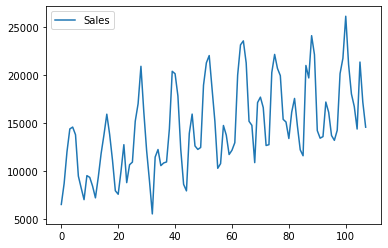

Shape:
 (108, 2)

Head:
      Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


In [3]:
# Info. Dataset
path = './Datasets/monthly-car-sales.csv'
sales_data = read_csv(path, header=0)

sales_data.plot()
plt.show()

print('Shape:\n',sales_data.shape)
print('\nHead:\n', sales_data.head())

# preprocessing
sales_data.columns = ['ds','y']
sales_data['ds'] = to_datetime(sales_data['ds'])

## Prophet model - Fit

In [4]:
model = Prophet()
model.fit(sales_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecast
### In-Sample Forecast
- Useful to make a forecast on historical data
- Forecasting on data used as input to train the model. 

**Example: Forecasting last 12 Months and Prediction of first five months**

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14372.957414  12771.928732  16036.120837
1 1968-02-01  14935.370169  13446.370936  16585.187316
2 1968-03-01  20885.171425  19225.190927  22507.801473
3 1968-04-01  22912.780725  21243.299697  24463.865757
4 1968-05-01  24211.263981  22737.837623  25836.291427


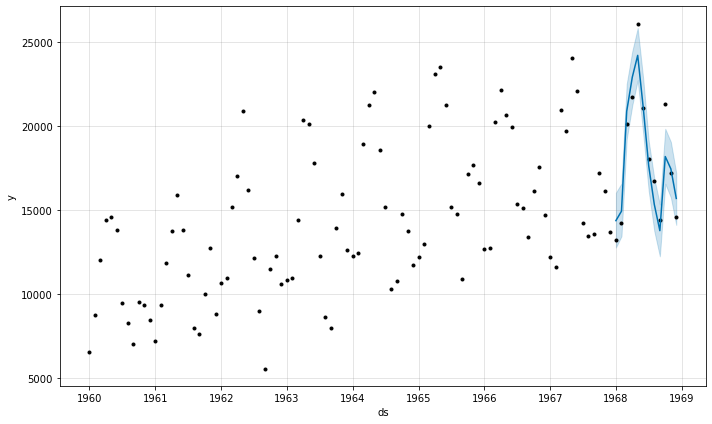

In [14]:
from pandas import DataFrame

# creating and appending forecast data frame
future = list()

for i in range(1, 13):
    date = '1968-%02d' %i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

forecast = model.predict(future)
print(forecast[['ds','yhat','yhat_lower', 'yhat_upper']].head())

# plot forecast
model.plot(forecast)
plt.show()

### Out-of-Sample Forecast
- Forecast model to make prediction beyond the training data
- forecast period period beyond the end of the training dataset, starting 1969-01.

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15434.545707  13813.592290  17053.317637
1 1969-02-01  16201.578742  14680.256413  17759.351020
2 1969-03-01  21401.795137  19798.270370  22979.862887
3 1969-04-01  23531.796522  21870.653204  25169.731442
4 1969-05-01  25042.527544  23405.958585  26595.390079


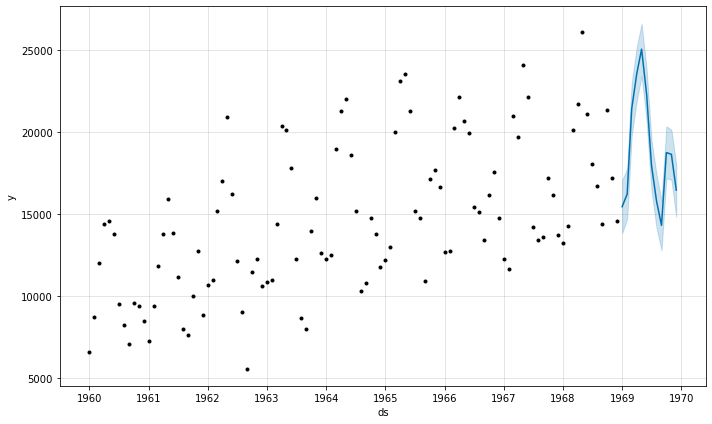

In [15]:
from pandas import DataFrame

future = list()

for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# plot forecast
model.plot(forecast)
plt.show()

## Evaluation

 Development of an objective estimate of a forecast model's performance.

### Test-Set( last 12 months)

- Simulated Out-of-Sample forecast.
- Fitting the model on the dataframe and calculating error measure(e.g. Mean Absolute Error ) over the forecasts. test-set(last 12 months)

**DataFrame for training with the last 12 months removed.**

In [25]:
# create test dataset, remove last 12 months
train = sales_data.drop(sales_data.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


MAE : 1376.329 


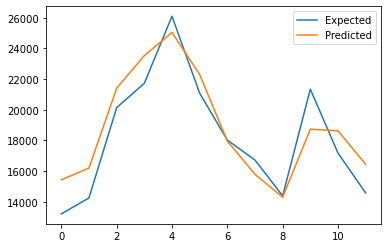

In [38]:
from sklearn.metrics import mean_absolute_error

# Expected values vs Predicted values
y_true = sales_data['y'][-12:].values
y_pred = forecast['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
print('MAE : %.3f ' %mae)

# Plots

plt.plot(y_true, label='Expected')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

***